In [1]:
import numpy as np
import pandas as pd


In [4]:
df = pd.read_csv('/content/placement.csv')

In [ ]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123,1
1,1,5.9,106,0
2,2,5.3,121,0
3,3,7.4,132,1
4,4,5.8,142,0


In [5]:
df = df.iloc[:,1:]

In [6]:
df.head()

,cgpa,iq,placement
0,6.8,123,1
1,5.9,106,0
2,5.3,121,0
3,7.4,132,1
4,5.8,142,0


In [7]:
import matplotlib.pyplot as plt

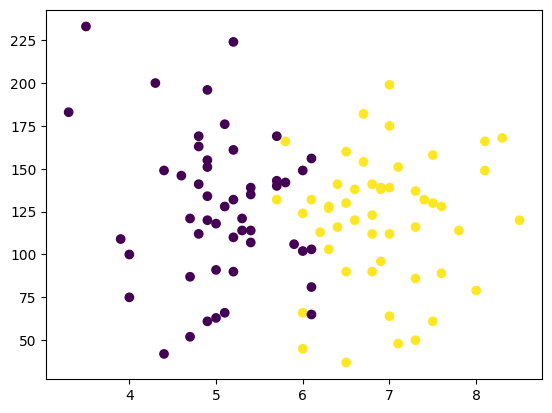

In [8]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

In [19]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [20]:
x

,cgpa,iq
0,6.8,123
1,5.9,106
2,5.3,121
3,7.4,132
4,5.8,142
...,...,...
95,4.3,200
96,4.4,42
97,6.7,182
98,6.3,103


In [22]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1)


In [29]:
x_train

,cgpa,iq
16,5.2,224
94,4.7,52
90,7.3,86
74,6.7,154
57,6.5,130
...,...,...
26,7.0,199
28,5.2,90
79,6.5,90
44,7.5,61


In [28]:
y_train

16    0
94    0
90    1
74    1
57    1
     ..
26    1
28    0
79    1
44    1
76    0
Name: placement, Length: 90, dtype: int64

In [27]:
x_test

,cgpa,iq
55,7.8,114
70,6.3,127
72,7.3,116
87,5.7,132
12,5.4,139
19,5.2,132
80,4.9,196
69,8.5,120
91,7.5,158
3,7.4,132


In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
scaler = StandardScaler()

In [32]:
x_train = scaler.fit_transform(x_train)

In [33]:
x_train

array([[-0.65079536,  2.48927624],
       [-1.1006539 , -1.71382108],
       [ 1.23861052, -0.88297626],
       [ 0.69878027,  0.77871338],
       [ 0.51883685,  0.19223468],
       [-0.74076707,  0.14336146],
       [ 0.96869539, -1.42058173],
       [ 0.24892173, -0.22318773],
       [-1.46054073,  1.90279754],
       [-1.73045586, -1.15177899],
       [-1.01068219,  1.14526256],
       [ 0.06897831,  0.65653032],
       [-1.37056902,  0.65653032],
       [ 1.23861052,  0.36329097],
       [ 0.78875198,  0.46103742],
       [-1.01068219, -0.24762434],
       [ 1.86841248, -1.05403254],
       [ 0.06897831, -1.3717085 ],
       [-0.56082365, -0.19875111],
       [-0.56082365, -0.02769483],
       [ 0.33889343, -0.46755385],
       [-0.65079536,  0.94976967],
       [ 0.51883685,  0.92533305],
       [-0.83073877, -1.44501834],
       [ 1.50852564,  0.14336146],
       [-0.47085194,  0.31441775],
       [ 0.96869539,  1.29188224],
       [-1.73045586, -0.54086369],
       [ 1.0586671 ,

In [36]:
x_test=scaler.transform(x_test)

In [37]:
x_test

array([[ 1.68846906, -0.19875111],
       [ 0.33889343,  0.11892485],
       [ 1.23861052, -0.14987789],
       [-0.20093682,  0.24110791],
       [-0.47085194,  0.41216419],
       [-0.65079536,  0.24110791],
       [-0.92071048,  1.8050511 ],
       [ 2.31827102, -0.05213144],
       [ 1.41855393,  0.87645983],
       [ 1.32858223,  0.24110791]])

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
clf.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred=clf.predict(x_test)

In [44]:
y_test

55    1
70    1
72    1
87    1
12    0
19    0
80    0
69    1
91    1
3     1
Name: placement, dtype: int64

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.9

In [54]:
!pip install mlxtend --upgrade --no-deps
from mlxtend.plotting import plot_decision_regions


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


TypeError: ignored

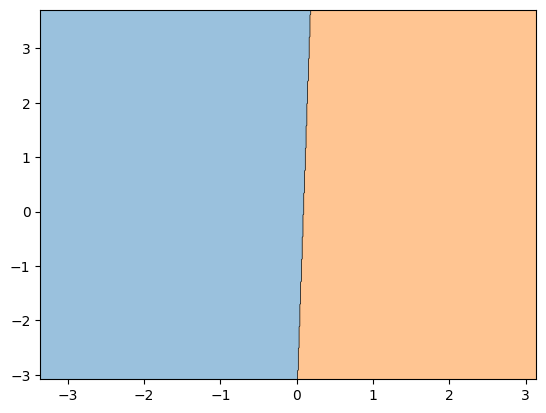

In [55]:
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)

In [56]:
import pickle

In [57]:
pickle.dump(clf,open('model.pkl','wb'))